<a href="https://colab.research.google.com/github/furewing/dataAnalysis/blob/main/2_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_02_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC_Numpy_%EC%99%84%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numpy
교재: 데이터 과학을 위한 파이썬 머신러닝(Chapter03)

- <a href="#03.1넘파이란">03.1 넘파이란</a>
- <a href="#03.2넘파이배열객체다루기">03.2 넘파이 배열 객체 다루기</a>
- <a href="#03.3넘파이배열연산">03.3 넘파이 배열 연산</a>
- <a href="#03.4비교연산과데이터추출">03.4 비교 연산과 데이터 추출</a>

---------------

### 라이브러리 설치

In [ ]:
!pip install numpy

In [1]:
import numpy as np
print(f'numpy version : {np.__version__}')

numpy version : 1.25.2


------------------------------

## <a name="03.1넘파이란">03.1 넘파이란</a>

- https://numpy.org/
- 파이썬의 고성능 과학 계산용 라이브러리
- 벡터나 행렬 같은 선형대수의 표현법을 코드로 처리
- 사실상의 표준 라이브러리
- 다차원 리스트나 크기가 큰 데이터 처리에 유리

### [예제] 선형대수의 표현법을 코드로 처리
$2x_1 + 2x_2 + x_3 = 9$ <br>
$2x_1 - x_2 + 2x_3 = 6$ <br>
$x_1 - x_2 + 2x_3 = 5$ <br>

### 특수 행렬
- numpy 행렬을 위한 참고 정보

|구분 |영문설명| numpy.함수명()|
|:---|:---|:---|
|대각행렬|Diagonal matrix | np.diag(x) |
|내적(행렬 곱)|Dot Product, Inner product| np.dot(a,b) , a @ b|
|대각합|Trace | np.trace(x)|
|행렬식|Matrix Deteminant  | np.linalg.det(x) |
|역행렬|Inverse of a matrix  | np.linalg.inv(x) |
|고유값, 고유벡터 |Eigenvalue, Eigenvector  | w, v = np.linalg.eig(x) |
|특이값 분해 |Singular value Decomposition  |u,s,vh = np.linalg.svd(A) |
|연립방정식 해 풀기 |Solve a linear matrix equation  | np.linalg.slove(a, b) |
|최소자승 해 풀기 |Compute the Least-squares solution  | m, c = np.linalg.lstsq(A,y,rcond=None)[0] |

In [ ]:
arr1 = np.array([[2,2,1],
                 [2,-1,2],
                 [1,-1,2]])
arr2 = np.array([[9],[6],[5]])
print(f'선형연립방정식 결과:\n{np.linalg.solve(arr1, arr2)}')

In [2]:
# sympy를 이용한 선형연립방정식 해 구하기
from sympy import *

M = Matrix([[2,2,1,9],
            [2,-1,2,6],
            [1,-1,2,5]])
print("Matrix : {} ".format(M))

# Use sympy.rref() method
M_rref = M.rref()

print("The Row echelon form of matrix M and the pivot columns : {}".format(M_rref))

Matrix : Matrix([[2, 2, 1, 9], [2, -1, 2, 6], [1, -1, 2, 5]]) 
The Row echelon form of matrix M and the pivot columns : (Matrix([
[1, 0, 0, 1],
[0, 1, 0, 2],
[0, 0, 1, 3]]), (0, 1, 2))


### [예제] 사실상의 표준 라이브러리 (다른 라이브러리의 기본 라이브러리)

In [ ]:
# 영상처리 & 컴퓨터 비전 라이브러리
!pip install opencv-python

In [ ]:
import sys
import cv2

image = cv2.imread('./cat.jpg')
if image is None:
    print('Image load failed!')
    sys.exit()

# print(image)
print(type(image))
print(image.dtype)

# cv2_imshow(image)   # 코랩에서 이미지 확인하는 경우
cv2.namedWindow('image')
#cv2.imshow("image", image)
cv2_imshow(image)
cv2.waitKey()
cv2.destroyAllWindows()


In [ ]:
# 머신러닝 라이브러리
!pip install scikit-learn

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris

### [예제] 다차원 리스트나 크기가 큰 데이터 처리에 유리
loop 프로그래밍 없이 전체 배열에 대해서 표준 수학 함수를 매우 빠른 속도로 수행할 수 있습

In [2]:
import numpy as np

arr = np.arange(16)
print(arr)
arr1 = arr.reshape(4, -1)   # 2차원
print(arr1)
arr2 = arr.reshape(4, 2, 2) # 3차원 (면,행,렬)
print(arr2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]

 [[12 13]
  [14 15]]]


In [ ]:
import sys
import numpy as np
import cv2

src = cv2.imread('./image/cat.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 마스크처리: 부드럽게
mask = np.array([[1/9,1/9,1/9],
                [1/9,1/9,1/9],
                [1/9,1/9,1/9]])
# mask = np.ones((3,3), dtype=np.float64)/ 9.

# 마스크처리: 날카롭게
# mask = np.array([[0,-1,0],
#                 [-1,4,-1],
#                 [0,-1,0]])

# 마스크 적용
dst = cv2.filter2D(src, -1, mask)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()  # 키가 눌려질때까지 기다리기
cv2.destroyAllWindows()

-----------------

## <a name="03.2넘파이배열객체다루기">03.2 넘파이 배열 객체 다루기</a>

### 1. 넘파이 배열과 텐서

In [4]:
from IPython.display import Image
Image(url='https://codetorial.net/tensorflow/_images/basics_of_tensor_01.png') # 웹 파일

### 2. 배열의 메모리 구조
- https://numpy.org/doc/stable/reference/arrays.html
- np.array 함수 사용하여 배열 생성
- 배열의 모든 구성 요소에 값이 존재해야 함
- 하나의 데이터 타입만 사용
- 각 값 메모리 크기가 동일
- 검색이나 연산 속도가 리스트에 비해 훨씬 빠름

### 3. 배열의 생성 : np.array, dtype

In [3]:
# np.array : 다차원 배열 생성
arr = np.array([1,2,3,4])               # 1차원 배열 정의
arr = np.array([[1,2,3,4],[1,2,3,4]])   # 2차원 배열 정의
arr = np.array([[[1,2,3,4],[1,2,3,4]],[[1,2,3,4],[1,2,3,4]]])   # 3차원 배열 정의

print(f'arr = {arr}')              # 배열
print(f'type = {type(arr)}')       # 배열 타입
print(f'dtype = {arr.dtype}')      # 배열 데이터 타입
print(f'shape = {arr.shape}')      # 배열 구조
print(f'dimension = {arr.ndim}')   # 차원
print(f'strides = {arr.strides}')  # 각 dimensions를 건너가는데 몇 bytes나 뛰어넘어야 하는지에 대한 정보

arr = [[[1 2 3 4]
  [1 2 3 4]]

 [[1 2 3 4]
  [1 2 3 4]]]
type = <class 'numpy.ndarray'>
dtype = int64
shape = (2, 2, 4)
dimension = 3
strides = (64, 32, 8)


In [5]:
# dtype : 데이터 타입 확인
arr = np.array([1,2,3.5,4])
arr = np.array([1,2,3.5,4], float)
arr = np.array([1,2,3.5,4], dtype=np.float64)
arr.itemsize  # itemsize로 넘파이 배열에서 각 요소가 차지하는 바이트(byte) 확인
np.finfo('float64')        # float64 타입이 사용할 수 있는 값 범위 확인
# np.f\iinfo('float64')    # int종류 타입이 사용할 수 있는 값 범위 확인

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

### 4. 배열의 구조 다루기 : reshape, flatten

In [6]:
arr = np.array([[1,2,5,8],[1,2,5,8]])
arr.shape

(2, 4)

In [ ]:
arr.reshape(4,2)
arr.reshape(2,-1)

In [7]:
arr = np.array(range(8)).reshape(4,2)
arr

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [8]:
arr.flatten()

array([0, 1, 2, 3, 4, 5, 6, 7])

### 5. 인덱싱과 슬라이싱

In [9]:
arr = np.array([[[1,2,3,4],[5,6,7,8]],[[9,10,11,12],[13,14,15,16]]])
arr[0][0][0]  # 면(층),행,열

1

In [10]:
arr[::, ::, ::]# 면(층),행,열 (:: -> start:end:step)
arr[:, :, :]

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]]])

In [ ]:
arr[1:, 1:, 2:4]# 면(층),행,열

### 6.배열 생성 함수

In [11]:
# arange()
print(f'np.arange(10)      : {np.arange(10)}')
print(f'np.arange(-5,5)    : {np.arange(-5,5)}')
print(f'np.arange(0,5,0.5) : {np.arange(0,5,0.5)}')

np.arange(10)      : [0 1 2 3 4 5 6 7 8 9]
np.arange(-5,5)    : [-5 -4 -3 -2 -1  0  1  2  3  4]
np.arange(0,5,0.5) : [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]


In [ ]:
a, b = 3, 4
print('%d + %d = %d' % (a,b,a+b))
print(f'{a} + {b} = {a+b}')

In [ ]:
arr
# np.ones(arr)

In [12]:
# ones, zeros, empty
print(f'np.ones(shape=(2,4),dtype=np.float32) :\n{np.ones(shape=(2,4), dtype=np.float32)}')
print(f'np.zeros(shape=(2,4),dtype=np.float32) :\n{np.zeros(shape=(2,4), dtype=np.float32)}')
print(f'np.empty(shape=(2,4),dtype=np.float32) :\n{np.empty(shape=(2,4), dtype=np.float32)}')

np.ones(shape=(2,4),dtype=np.float32) :
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
np.zeros(shape=(2,4),dtype=np.float32) :
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
np.empty(shape=(2,4),dtype=np.float32) :
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [13]:
# ones_like, zeros_like, empty_like : 구조만 동일하게
arr = np.arange(12).reshape(3,4)
print(arr)
np.ones_like(arr)
np.zeros_like(arr)
np.empty_like(arr)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [14]:
# identity, eye, diag
np.identity(n=3, dtype=int)    # 매개변수 n으로 n×n 단위행렬 생성
np.eye(N=3, M=5, k=2)          # 행(N), 열(M), 열인덱스시작(k) 지정하여 단위행렬 생성

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [15]:
# diag : 행렬의 대각성분 값을 추출
arr = np.arange(9).reshape(3,3)
np.diag(arr)
np.diag(arr, k=1)


array([1, 5])

### 7. 통계 분석 함수

In [16]:
# normal 함수 : 정규분포 함수
np.random.normal(0, 2, 10)   # (평균값, 분산, 데이터개수)

array([ 1.11043837,  2.02445189,  1.22695821, -0.85032802,  0.59926447,
        0.50102754,  2.51052674,  1.87434657, -2.7305903 , -1.27780291])

In [17]:
# mean, min, max, var, std, argmax, argmin
arr = np.array([18,5,10,23,19,-8,10,0,0,5,2,15,8,2,5,4,15,-1,4,-7,-24,7,9,-6,23,-13])
print(f'평균     : {np.mean(arr)}')
print(f'중앙강   : {np.median(arr)}')
print(f'최소     : {np.min(arr)}')
print(f'최대     : {np.max(arr)}')
print(f'분산     : {np.var(arr)}')
print(f'표준편차 : {np.std(arr)}')
print(f'최소값인덱스 : {np.argmin(arr)}')
print(f'최대값인덱스 : {np.argmax(arr)}')
print(f'3사분위수    : {np.percentile(arr, 75)}')

hist, bins = np.histogram(arr, bins=5)  # 히스토그램
print(f'도수분포 구간 : {bins}')
print(f'도수분포 도수 : {hist}')

평균     : 4.8076923076923075
중앙강   : 5.0
최소     : -24
최대     : 23
분산     : 115.23224852071006
표준편차 : 10.734628476137871
최소값인덱스 : 20
최대값인덱스 : 3
3사분위수    : 10.0
도수분포 구간 : [-24.  -14.6  -5.2   4.2  13.6  23. ]
도수분포 도수 : [1 4 7 8 6]


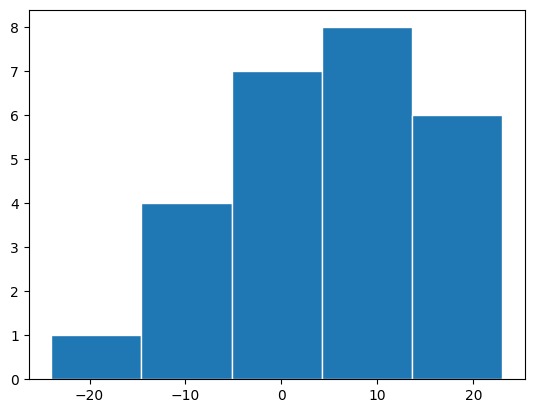

In [18]:
import matplotlib.pyplot as plt

plt.hist(arr, bins, edgecolor='w')
plt.show()

-----------------

## <a name="03.3넘파이배열연산">03.3 넘파이 배열 연산</a>

### 1. 연산 함수
- 배열 내부 연산을 지원하는 함수
- 축(axis) : 배열의 랭크가 증가할 때마다 새로운 축이 추가되어 차원 증가

In [19]:
# sum : 지정된 축 기준 요소 합
np.arange(1, 11).sum()
np.arange(1,13).reshape(3,4).sum(axis=0)  # 행기준 - 열별 합산
np.arange(1,13).reshape(3,4).sum(axis=1)  # 열기준 - 행별 합산

arr = np.arange(1, 13).reshape(3, 4)
arr_tensor = np.array([arr,arr,arr])
arr_tensor.sum(axis=0)       # 층기준 - 면의 동일위치요소 합산
arr_tensor.sum(axis=1)       # 행기준 - 열별 합산
arr_tensor.sum(axis=2)       # 열기준 - 행별 합산

array([[10, 26, 42],
       [10, 26, 42],
       [10, 26, 42]])

In [20]:
# mean , sqrt
np.arange(1,13).reshape(3,4).mean(axis=0)    # 행기준 - 열별 평균
np.arange(1,13).reshape(3,4).mean(axis=1)    # 열기준 - 행별 평균
np.sqrt(np.arange(1,13).reshape(3,4))        # 열기준 - 행별 제곱근

array([[1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712],
       [3.        , 3.16227766, 3.31662479, 3.46410162]])

### 2. 연결 함수
두 객체 간의 결합을 지원하는 함수

In [21]:
# vstack, hstack
v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])
np.vstack((v1, v2))         # 배열을 수직으로 붙여 하나의 행렬을 생성
np.hstack((v1, v2))         # 배열을 수평으로 붙여 하나의 행렬을 생성

# concatenate : 축을 고려하여 두 개의 배열을 결합
# - 생성될 배열 차원 = 소스 배열의 차원이 같아야 함
v1 = np.array([[1, 2, 3]])
v2 = np.array([[4, 5, 6]])
np.concatenate((v1,v2), axis=0)

array([[1, 2, 3],
       [4, 5, 6]])

### 3. 사칙연산 함수
- 행렬과 행렬, 벡터와 백터 간 사칙연산이 가능
- 두 배열의 구조가 동일할 경우 같은 인덱스 요소들끼리 연산

In [23]:
# 사친연산
arr1 = np.array([[1,1],
                 [1,1]])
arr2 = np.array([[2,2],
                 [2,2]])
print(f'matrix addition     :\n {arr1 + arr2}\n')
print(f'matrix subtraction  :\n {arr1 - arr2}\n')
print(f'matrix multipication:\n {arr1 * arr2}\n')
print(f'matrix division     :\n {arr1 / arr2}\n')

matrix addition     :
 [[3 3]
 [3 3]]

matrix subtraction  :
 [[-1 -1]
 [-1 -1]]

matrix multipication:
 [[2 2]
 [2 2]]

matrix division     :
 [[0.5 0.5]
 [0.5 0.5]]



In [22]:
# dot 함수 : 벡터의 내적 연산
arr1 = np.arange(1, 7).reshape(2,3)
arr2 = np.arange(1, 7).reshape(3,2)
print(f'arr1 :\n{arr1}')
print(f'arr2 :\n{arr2}')
print(f'arr1 @ arr2 :\n{arr1.dot(arr2)}')
print(f'arr1 @ arr2 :\n{np.dot(arr1, arr2)}')

arr1 :
[[1 2 3]
 [4 5 6]]
arr2 :
[[1 2]
 [3 4]
 [5 6]]
arr1 @ arr2 :
[[22 28]
 [49 64]]
arr1 @ arr2 :
[[22 28]
 [49 64]]


- **브로드캐스팅 연산(broadcasting operations)** <br>
하나의 행렬과 스칼라 값들 간의 연산이나 행렬과 벡터 간의 연산

In [ ]:
# 브로드캐스팅 연산
arr = np.arange(1, 10).reshape(3,3)
print(arr + 10)
print(arr - 10)
arr * 10
arr // 10
arr ** 2

In [ ]:
arr = np.arange(1, 13).reshape(4,3)
v   = np.arange(10 , 40 , 10)
arr + v

-----------------

## <a name="03.4비교연산과데이터추출">03.4 비교 연산과 데이터 추출</a>

### 1. 비교 연산
연산 결과는 항상 불린형(boolean type)을 가진 배열로 추출

In [25]:
# 브로드캐스팅 비교 연산(하나의 스칼라 값과 벡터 간의 비교 연산은 벡터 내 전체 요소에 적용))
arr = np.array([4, 3, 2, 6, 8, 5])
arr > 3

array([ True, False, False,  True,  True,  True])

In [ ]:
# 요소별 비교 연산(두 개의 배열 간 배열의 구조(shape)가 동일한 경우)
# - 동일 위치 요소들끼리 비교 연산
arr1 = np.array([1, 3, 0])
arr2 = np.array([2, 1, 7])
arr1 > arr2

### 2. 비교 연산 함수

In [24]:
# all, any
arr = np.array([4, 3, 2, 6, 8, 5])
(arr > 3).all()      # 조건이 모두 참이어야 참
(arr > 3).any()      # 참이 되는 조건이 하나라도 있으면 참

True

In [26]:
# 인덱스 반환 함수
arr = np.array([4, 3, 2, 6, 8, 5])
np.where(arr > 5)           # 참이 되는 요소의 인덱스 반환
np.where(arr > 5, 10, 20)   # 참이면 요소를 10, 거짓이면 20으로 변환하여 반환

array([20, 20, 20, 10, 10, 20])

In [28]:
# 정렬된 값의 인덱스를 반환해주는 함수
# argsort, argmax, argmin
arr = np.array([4, 3, 2, 6, 8, 5])
np.argsort(arr)            # 배열 내 값들을 작은 순서대로 인덱스를 반환
np.argmax(arr)             # 배열 내 값들 중 가장 큰 값의 인덱스를 반환
np.argmin(arr)             # 배열 내 값들 중 가장 작은 값의 인덱스를 반환

2

### 3. 인덱스를 활용한 데이터 추출
- 불린 인덱스(boolean index) : 배열에 있는 값들을 반환할 특정 조건을 불린형의 배열에 넣어서 추출
- 팬시 인덱스(fancy index) : 정수형 배열의 값을 사용하여 해당 정수의 인덱스에 위치한 값을 반환

In [29]:
# 불린 인덱스(boolean index)
arr = np.array([4, 3, 2, 6, 8, 5])
print(f'arr > 3      : {arr > 3}')
print(f'arr[arr > 3] : {arr[arr > 3]}')

arr > 3      : [ True False False  True  True  True]
arr[arr > 3] : [4 6 8 5]


In [30]:
# 팬시 인덱스(fancy index)
arr = np.array([4, 3, 2, 6, 8, 5])
cond = np.array([1, 2, 0, 2, 2, 2])   # 값이 인덱스로 사용된다.
arr[cond]                              # arr배열에서 cond 배열값을 인덱스로 갖는 요소 추출하기
# arr.take(cond)

array([3, 2, 4, 2, 2, 2])

--------------

THE END